## 1. Elaboração do problema

## 2. Importando as biblioteca e carregandos os dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

mpl.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_excel('default of credit card clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3. Contato inicial e limpeza dos dados

O dataset que estamos trabalhando, empregou uma variável binária, o pagamento inadimplente, como sendo **1** para **SIM** e **0** para **NÃO**
- **ID**: Número de identificação atribuído a cada cliente
- **LIMIT_BAL**: Limite de Crédito
- **SEX**: Gênero
- **EDUCATION**: Nível de educação
- **MARRIAGE**: Estado civil
- **AGE**: Idade
- **PAY_**: Quando as últimas 6 contas foram pagas
- **BLL_AMT**: Quais foram as últimas 6 contas
- **PAY_AMT**: Quanto foram os úlitmos pagamentos
- **default payment next month**

De forma a facilitar o entendimento da nossa variável que iremos realizar a predição, vamos renomea-lá de **default payment next month** para apenas **DEFAULT**.

In [13]:
df.rename({'default payment next month':'DEFAULT'}, axis = 'columns',
         inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Neste problema não iremos fazer uso da coluna (_feature_) **ID**, por esse motivo vamos descartá-la.

In [14]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Um breve resumo das estatísticas descritivas do nosso conjunto de dados está mostrado na célula logo abaixo.

In [16]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Podemos tirar algumas características dos nossos dados olhando para a tabela acima, como por exemplo:
- Dos clientes presentes no dataset, o mais novo apresenta a idade de 21 anos e o mais velho apresenta a idade de 79 anos.
- A média do limite do cartão de crédito dos clientes é de 167.484,32 dólares.

Vamos entender melhor o significado de cada uma das _features_ do dataset e quais valores (ou categorias) as mesmas podem tomar.

- **LIMIT_BAL**, a quantidade de crédito disponível **Inteiro**
- **SEX**: **Categórica**
    - 1 = Masculino
    - 2 = Feminino
- **EDUCATION**: **Categórica**
    - 1 = Pós-graduação
    - 2 = Universidade
    - 3 = Ensino médio
    - 4 = Outros
- **MARRIAGE**: **Categórica**
    - 1 = Casado
    - 2 = Solteiro
    - 3 = Outros
- **AGE**: **Inteiro**
- **PAY_**: quando as últimas 6 contas foram pagas **Categórica**
    - -1 = Paga no tempo certo
    - 1 = Pagamento atrasado em 1 mês
    - 2 = Pagamento atrasado em 2 meses
    - ...
    - 7 = Pagamento atrasado em 7 meses
    - 8 = Pagamento atrasado em 8 meses ou mais
- **BLL_AMT**: quais foram as últimas 6 contas **Inteiro**
- **PAY_AMT**: de quanto foram os últimos pagamentos **Inteiro**
- **DEFAULT**
    - 0 = Não Inadimplente
    - 1 = Inadimplente

In [35]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [21]:
colunas = list(df.columns)
for col in colunas:
    print("{} : ".format(col))
    print(df[col].unique())

LIMIT_BAL : 
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX : 
[2 1]
EDUCATION : 
[2 1 3 4]
MARRIAGE : 
[1 2 3 0]
AGE : 
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 : 
[ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 : 
[ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_

Pela célula acima, vemos que as features `EDUCATION` e `MARRIAGE` não estão disponíveis da forma como esperamos. Por esse motivo, vamos ajusta-las deixando-as no formato que foi apresentado anteriormente

In [23]:
df['EDUCATION'].replace(to_replace=[0,5,6], value = 4, inplace=True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [24]:
df['MARRIAGE'].replace(to_replace=0, value = 3, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Antes de partirmos para a análise exploratória, vamos verificar se o nosso dataset possui valores faltantes em suas instâncias.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [37]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

Não existem valores faltantes nesse dataset, dessa forma, podemos seguir com a análise exploratória dos dados.

## 4. Análise Exploratória dos Dados (EDA)

O objetivo principal deste projeto é desenvolver um modelo de _Machine Learning_ que seja capaz de identificar se um determinado cliente pode a pagar ou não, a sua fatura do cartão de crédito. Em outras palavras, identificar um potencial cliente inadimplente. Nesse conjunto de dados que estamos trabalhando, precisamos inicialmente entender como está distribuida a porcentagem de clientes que realizaram o pagamento de suas faturas ou não. Esso é o nosso objetivo, (_target_).

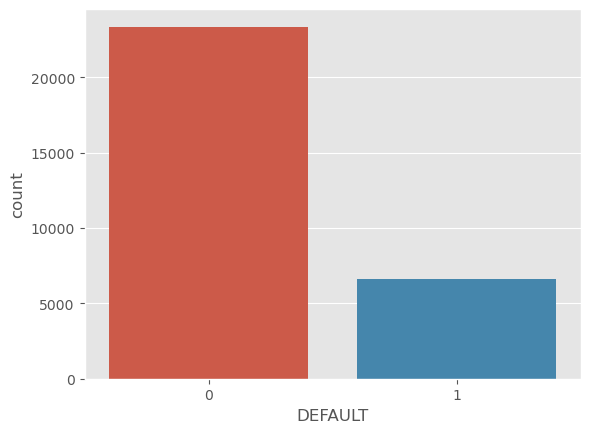

In [39]:
sns.countplot(x=df['DEFAULT']);

In [42]:
sim = df['DEFAULT'] == 1
nao = df['DEFAULT'] == 0
total = len(df['DEFAULT'])
proporcao_sim = (sim.sum()/total)*100
proporcao_nao = (nao.sum()/total)*100
print(f"Sim: {proporcao_sim:.2f} %")
print(f"Não: {proporcao_nao:.2f} %")

Sim: 22.12 %
Não: 77.88 %


Dentre os clientes do dataset, **22,12%** deles não realizaram o pagamento da sua fatura do cartão de crédito. Então baseado nas caracteristicas desses clientes que iremos desenvolver um modelo que consiga no dizer se um futuro cliente que está solicitando um cartão de crédito é um potencial inadimplente ou não. 

Posteriormente será analisado a necessidade ou não de realizar um balanceamento das duas classes que estão mostradas logo acima.

Vamos avaliar a distribuição das nossas principais variáveis contínuas `LIMIT_BAL` e `AGE`.

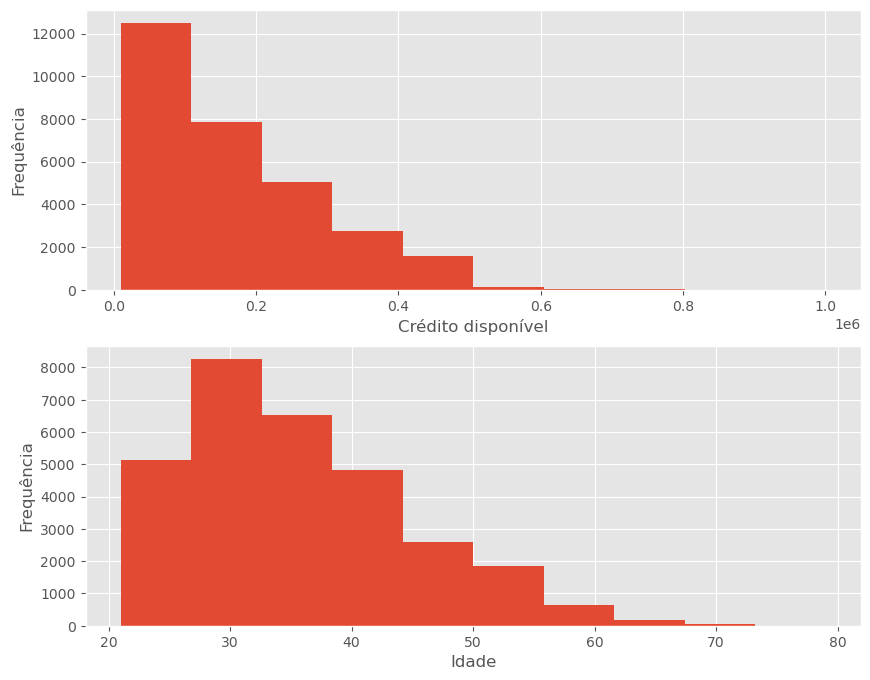

In [49]:
fig, axes = plt.subplots(nrows=2, figsize=(10,8))
plt.sca(axes[0])
df['LIMIT_BAL'].plot(kind='hist')
plt.xlabel('Crédito disponível')
plt.ylabel('Frequência')
plt.sca(axes[1])
df['AGE'].plot(kind='hist')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show();

Vamos avaliar a distribuição das variáveis categóricas `EDUCATION` e `MARRIAGE`.

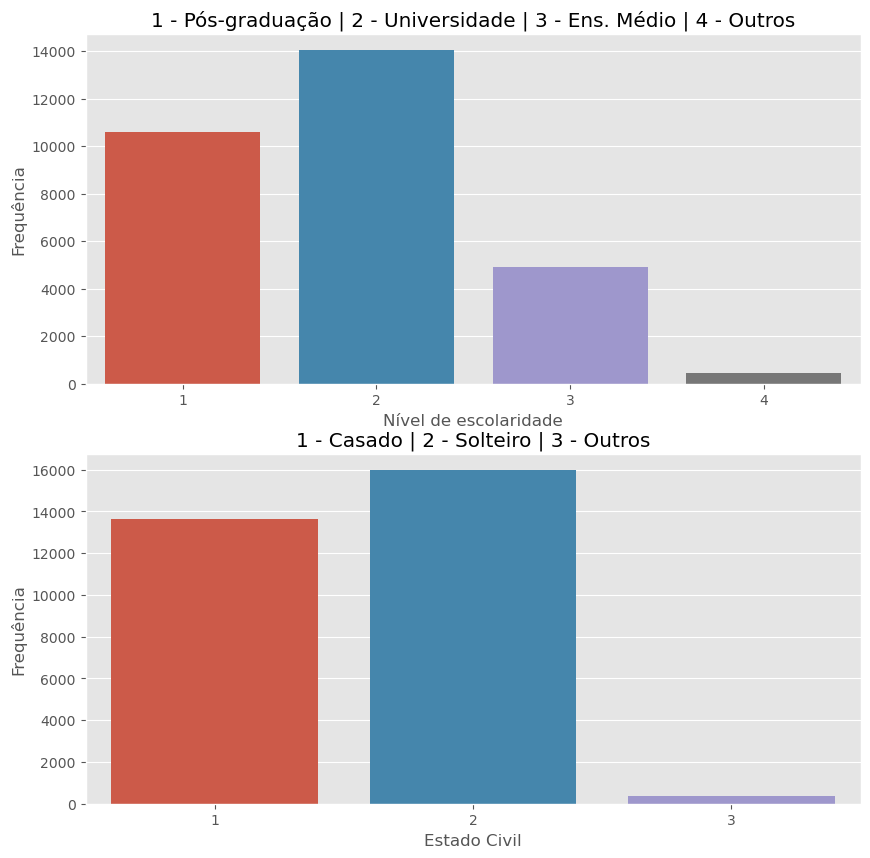

In [67]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))
plt.sca(axes[0])
sns.countplot(x=df['EDUCATION'])
plt.xlabel('Nível de escolaridade')
plt.ylabel('Frequência')
plt.title('1 - Pós-graduação | 2 - Universidade | 3 - Ens. Médio | 4 - Outros')
plt.sca(axes[1])
sns.countplot(x=df['MARRIAGE'])
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.title('1 - Casado | 2 - Solteiro | 3 - Outros')
plt.show();

### 4.1 Correlações

## 5. Pré-processamento dos dados

### 5.1 _RandomUnderSampler_

In [12]:
X = df.drop('DEFAULT', axis=1).copy()
y = df['DEFAULT'].copy()

rus = RandomUnderSampler(sampling_strategy='auto',
                        random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,y)

In [13]:
X_resampled.shape, y_resampled.shape

((13262, 23), (13262,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                   y_resampled,
                                                   random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9946, 23), (3316, 23), (9946,), (3316,))

### 5.3 Combinações de diferentes features engineering

In [16]:
numericas = []
categoricas = []

for col in list(df.columns):
    if df[col].nunique() > 11:
        numericas.append(col)
    else:
        categoricas.append(col)
del(categoricas[-1])

In [17]:
cat_transformer_OH = Pipeline(steps = [
    ('one hot enc', OneHotEncoder(categories='auto', handle_unknown = 'ignore'))
])

num_transformer_MM = Pipeline(steps = [
    ('min max scaler', MinMaxScaler())
])

num_transformer_SS = Pipeline(steps = [
    ('standard scaler', StandardScaler())
])

num_transformer_RS = Pipeline(steps = [
    ('robust scaler', RobustScaler())
])

# Preprocessing 1
# One Hot Encoder + Min Max Scaler
preprocessing_1 = ColumnTransformer(transformers = [
    ('cat', cat_transformer_OH, categoricas),
    ('num', num_transformer_MM, numericas)
])

# Preprocessing 2
# One Hot Encoder + StandardScaler
preprocessing_2 = ColumnTransformer(transformers = [
    ('cat', cat_transformer_OH, categoricas),
    ('num', num_transformer_SS, numericas)
])

# Preprocessing 3
# One Hot Encoder + Robust Scaler
preprocessing_3 = ColumnTransformer(transformers = [
    ('cat', cat_transformer_OH, categoricas),
    ('num', num_transformer_RS, numericas)
])

# Preprocessing 4
# One Hot Encoder sem escalonamento
preprocessing_4 = ColumnTransformer(transformers = [
    ('cat', cat_transformer_OH, categoricas)
])

preprocessing_list = [preprocessing_1, preprocessing_2, 
                     preprocessing_3, preprocessing_4]

## 6. Aplicando diversos modelos

In [18]:
modelos = [LogisticRegression(),
          KNeighborsClassifier(),
          SVC(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          xgb.XGBClassifier(objective='binary:logistic', seed=42)]

modelos_nomes = ['LogisticRegression',
                'KNeighbors',
                'SVC',
                'RandomForest',
                'AdaBoost',
                'GradientBoosting',
                'XGBoost']

for modelo in modelos:
    i = 1
    print(f"---- Métricas de desempenho - {modelo} ----")
    for preprocessing in preprocessing_list:
        pipe = Pipeline(steps = [('preprocessing', preprocessing),
                                ('modelos', modelo)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        print(f"-- preprocessing {i} --")
        print(f"- Acurácia: {accuracy_score(y_test, y_pred):.2f}")
        print(f"- Precisão: {precision_score(y_test, y_pred):.2f}")
        print(f"- Recall: {recall_score(y_test, y_pred):.2f}")
        print(f"- F1 score: {f1_score(y_test, y_pred):.2f}")
        print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
        i += 1

---- Métricas de desempenho - LogisticRegression() ----
-- preprocessing 1 --
- Acurácia: 0.71
- Precisão: 0.77
- Recall: 0.59
- F1 score: 0.67
- ROC-AUC: 0.71
-- preprocessing 2 --
- Acurácia: 0.71
- Precisão: 0.77
- Recall: 0.59
- F1 score: 0.67
- ROC-AUC: 0.71
-- preprocessing 3 --
- Acurácia: 0.71
- Precisão: 0.77
- Recall: 0.59
- F1 score: 0.67
- ROC-AUC: 0.71
-- preprocessing 4 --
- Acurácia: 0.70
- Precisão: 0.77
- Recall: 0.56
- F1 score: 0.65
- ROC-AUC: 0.70
---- Métricas de desempenho - KNeighborsClassifier() ----
-- preprocessing 1 --
- Acurácia: 0.66
- Precisão: 0.66
- Recall: 0.65
- F1 score: 0.65
- ROC-AUC: 0.66
-- preprocessing 2 --
- Acurácia: 0.67
- Precisão: 0.67
- Recall: 0.64
- F1 score: 0.66
- ROC-AUC: 0.67
-- preprocessing 3 --
- Acurácia: 0.66
- Precisão: 0.67
- Recall: 0.64
- F1 score: 0.66
- ROC-AUC: 0.66
-- preprocessing 4 --
- Acurácia: 0.64
- Precisão: 0.64
- Recall: 0.64
- F1 score: 0.64
- ROC-AUC: 0.64
---- Métricas de desempenho - SVC() ----
-- preprocess

<img src='resultados_preprocessing.jpg'>

- Logistic Regression: Preprocessing 1
    - One Hot Encoder + Min Max Scaler
- KNeighbors: Preprocessing 2
    - One Hot Encoder + Standard Scaler
- SVC: Preprocessing 1
    - One Hot Encoder + Min Max Scaler
- Random Forest: Preprocessing 2
    - One Hot Encoder + Standard Scaler
- AdaBoost: Preprocessing 2
    - One Hot Encoder + Standard Scaler
- GradientBoosting: Preprocessing 1
    - One Hot Encoder + Min Max Scaler
- XGBoost: Preprocessing 2
    - One Hot Encoder + Standard Scaler

In [19]:
ohe = OneHotEncoder(categories='auto', handle_unknown = 'ignore')
mm = MinMaxScaler()
ss = StandardScaler()

train_ohe = ohe.fit_transform(X_train[categoricas]).toarray()
test_ohe = ohe.transform(X_test[categoricas]).toarray()

X_train_ohe = pd.DataFrame(train_ohe,
                          columns=ohe.get_feature_names_out(),
                          index=X_train[categoricas].index)
X_test_ohe = pd.DataFrame(test_ohe,
                         columns=ohe.get_feature_names_out(),
                         index=X_test[categoricas].index)
X_train_full = pd.concat([X_train[numericas], X_train_ohe], axis = 1)
X_test_full = pd.concat([X_test[numericas], X_test_ohe], axis = 1)

train_mm = mm.fit_transform(X_train_full)
test_mm = mm.transform(X_test_full)

train_ss = ss.fit_transform(X_train_full)
test_ss = ss.transform(X_test_full)

X_train_pp1 = pd.DataFrame(train_mm,
                          columns = mm.get_feature_names_out(),
                          index = X_train_full.index)
X_test_pp1 = pd.DataFrame(test_mm,
                         columns = mm.get_feature_names_out(),
                         index = X_test_full.index)
X_train_pp2 = pd.DataFrame(train_ss,
                          columns = ss.get_feature_names_out(),
                          index = X_train_full.index)
X_test_pp2 = pd.DataFrame(test_ss,
                          columns = ss.get_feature_names_out(),
                         index= X_test_full.index)

In [20]:
X_train_pp1.shape, X_test_pp1.shape

((9946, 86), (3316, 86))

In [22]:
X_train_pp2.shape, X_test_pp2.shape

((9946, 86), (3316, 86))

In [89]:
modelos

[LogisticRegression(),
 KNeighborsClassifier(),
 SVC(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

## 7. Avaliando _Recursive Feature Elimination using Cross-Validation_ 

In [96]:
modelos = [LogisticRegression(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          xgb.XGBClassifier(objective='binary:logistic', seed=42)]

min_features_to_select = 5

rfecv_list = []
i = 0
for modelo in modelos:
    rfecv = RFECV(estimator = modelo,
                 step = 1,
                 cv = 5,
                 min_features_to_select = min_features_to_select)
    if modelo == LogisticRegression() or modelo == SVC() or modelo == GradientBoostingClassifier():
        rfecv.fit(X_train_pp1, y_train)
    else:
        rfecv.fit(X_train_pp2, y_train)
    rfecv_list.append(rfecv)
    print(f"{rfecv_list[i].n_features_}")
    print(f"{rfecv_list[i].support_}")
    i += 1


44
[ True False  True  True False  True  True False  True  True  True False
 False False False False False False False False  True False False  True
 False  True False  True  True  True  True  True False False  True  True
  True  True  True False False False  True False False  True False False
 False  True  True  True False  True  True  True  True False  True  True
 False  True False  True False  True  True False False False  True False
 False False  True  True  True False  True  True  True False False False
  True False]
85
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True 

In [109]:
modelos

[LogisticRegression(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

In [113]:
X_train_lr = rfecv_list[0].fit_transform(X_train_pp1, y_train)
X_test_lr = rfecv_list[0].transform(X_test_pp1)

X_train_rf = rfecv_list[1].fit_transform(X_train_pp2, y_train)
X_test_rf = rfecv_list[1].transform(X_test_pp2)

X_train_ab = rfecv_list[2].fit_transform(X_train_pp2, y_train)
X_test_ab = rfecv_list[2].transform(X_test_pp2)

X_train_gb = rfecv_list[3].fit_transform(X_train_pp1, y_train)
X_test_gb = rfecv_list[3].transform(X_test_pp1)

X_train_xgb = rfecv_list[4].fit_transform(X_train_pp2, y_train)
X_test_xgb = rfecv_list[4].transform(X_test_pp1)

model_lr = LogisticRegression()
model_lr.fit(X_train_lr, y_train)
y_pred_lr = model_lr.predict(X_test_lr)
print(f"--- {model_lr} ---")
print(f"- Acurácia: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_lr):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_lr):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.2f}\n")
      
model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf, y_train)
y_pred_rf = model_rf.predict(X_test_rf)
print(f"--- {model_rf} ---")
print(f"- Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_rf):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_rf):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_rf):.2f}\n")
      
model_ab = AdaBoostClassifier()
model_ab.fit(X_train_ab, y_train)
y_pred_ab = model_ab.predict(X_test_ab)
print(f"--- {model_ab} ---")
print(f"- Acurácia: {accuracy_score(y_test, y_pred_ab):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_ab):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_ab):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_ab):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_ab):.2f}\n")
      
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train_gb, y_train)
y_pred_gb = model_gb.predict(X_test_gb)
print(f"--- {model_gb} ---")
print(f"- Acurácia: {accuracy_score(y_test, y_pred_gb):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_gb):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_gb):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_gb):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_gb):.2f}\n")
      
model_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)
model_xgb.fit(X_train_xgb, y_train)
y_pred_xgb = model_xgb.predict(X_test_xgb)
print(f"--- {model_xgb} ---")
print(f"- Acurácia: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_xgb):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_xgb):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_xgb):.2f}\n")

--- LogisticRegression() ---
- Acurácia: 0.71
- Precisão: 0.77
- Recall: 0.59
- F1 Score: 0.67
- ROC-AUC: 0.71

--- RandomForestClassifier() ---
- Acurácia: 0.70
- Precisão: 0.73
- Recall: 0.65
- F1 Score: 0.69
- ROC-AUC: 0.70

--- AdaBoostClassifier() ---
- Acurácia: 0.70
- Precisão: 0.74
- Recall: 0.62
- F1 Score: 0.68
- ROC-AUC: 0.70

--- GradientBoostingClassifier() ---
- Acurácia: 0.71
- Precisão: 0.74
- Recall: 0.65
- F1 Score: 0.69
- ROC-AUC: 0.71

--- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, m

Não houve uma melhora significativa nos resultados utilizando RFECV

## 8. Tunagem dos hiperparâmetros

In [23]:
modelos = [LogisticRegression(),
          KNeighborsClassifier(),
          SVC(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          xgb.XGBClassifier(objective='binary:logistic', seed=42)]

param_dist_lr = {'C':np.logspace(-5,5,10),
                'solver':['liblinear','lbfgs','sag'],
                'max_iter':[100,1000,2500,5000]}

param_dist_knn = {'n_neighbors':[1,10,20,30,40,50],
                 'weights':['uniform','distance']}

param_dist_svc = {'C':np.logspace(-3,3,10),
                 'kernel':['linear','rbf','poly'],
                 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

param_dist_rf = {'max_depth':[3,None],
                'n_estimators':range(1,15),
                'max_features':np.linspace(1,50,2),
                'criterion':['gini','entropy']}

param_dist_ab = {'n_estimators':range(1,15),
                'learning_rate':[0.2, 0.4, 0.6, 0.8, 0.85]}

param_dist_gb = {'n_estimators':range(1,15),
                'learning_rate':[0.2, 0.4, 0.6, 0.8, 0.85],
                'max_depth':[3,None]}

param_dist_xgb = {'n_estimators':range(1,15),
                 'learning_rate':[0.2, 0.4, 0.6, 0.8, 0.85],
                 'max_depth':[3,None]}

# Busca dos hiperparâmetros para Logistic Regression
optimal_params_lr = GridSearchCV(LogisticRegression(),
                                param_dist_lr,
                                cv = 5,
                                scoring='recall')
optimal_params_lr.fit(X_train_pp1, y_train)
print("-- Logistic Regression --")
print(f"Melhores parâmetros: {optimal_params_lr.best_params_}")
print(f"Melhor score: {optimal_params_lr.best_score_:.2f}\n")

# Busca dos hiperparâmetros para KNN
optimal_params_knn = GridSearchCV(KNeighborsClassifier(),
                                 param_dist_knn,
                                 cv = 5,
                                 scoring='recall')
optimal_params_knn.fit(X_train_pp2, y_train)
print("-- KNN --")
print(f"Melhores parâmetros: {optimal_params_knn.best_params_}")
print(f"Melhor score: {optimal_params_knn.best_score_:.2f}\n")

# Busca dos hiperparâmetros para SVC
#optimal_params_svc = GridSearchCV(SVC(),
#                                 param_dist_svc,
#                                 cv = 5,
#                                 scoring='recall')
#optimal_params_svc.fit(X_train_pp1, y_train)
#print("-- SVC --")
#print(f"Melhores parâmetros: {optimal_params_svc.best_params_}")
#print(f"Melhor score: {optimal_params_svc.best_score_:.2f}\n")

# Busca dos hiperparâmetros para Random Forest
optimal_params_rf = GridSearchCV(RandomForestClassifier(),
                                param_dist_rf,
                                cv = 5,
                                scoring='recall')
optimal_params_rf.fit(X_train_pp2, y_train)
print("-- Random Forest --")
print(f"Melhores parâmetros: {optimal_params_rf.best_params_}")
print(f"Melhor score: {optimal_params_rf.best_score_:.2f}\n")

# Busca dos hiperparâmetros para AdaBoost
optimal_params_ab = GridSearchCV(AdaBoostClassifier(),
                                param_dist_ab,
                                cv = 5,
                                scoring='recall')
optimal_params_ab.fit(X_train_pp2, y_train)
print("-- AdaBoost --")
print(f"Melhores parâmetros: {optimal_params_ab.best_params_}")
print(f"Melhor score: {optimal_params_ab.best_score_:.2f}\n")

# Busca dos hiperparâmetros para GradientBoosting
optimal_params_gb = GridSearchCV(GradientBoostingClassifier(),
                                param_dist_gb,
                                cv = 5,
                                scoring='recall')
optimal_params_gb.fit(X_train_pp1, y_train)
print("-- GradientBoosting --")
print(f"Melhores parâmetros: {optimal_params_gb.best_params_}")
print(f"Melhor score: {optimal_params_gb.best_score_:.2f}\n")

# Busca dos hiperparâmetros para XGBoost
optimal_params_xgb = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', seed=42),
                                 param_dist_xgb,
                                 cv = 5,
                                 scoring='recall')
optimal_params_xgb.fit(X_train_pp2, y_train)
print("-- XGBoost --")
print(f"Melhores parâmetros: {optimal_params_xgb.best_params_}")
print(f"Melhor score: {optimal_params_xgb.best_score_:.2f}\n")


-- Logistic Regression --
Melhores parâmetros: {'C': 1e-05, 'max_iter': 100, 'solver': 'sag'}
Melhor score: 0.65

-- KNN --
Melhores parâmetros: {'n_neighbors': 10, 'weights': 'distance'}
Melhor score: 0.63

-- Random Forest --
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1.0, 'n_estimators': 7}
Melhor score: 0.65

-- AdaBoost --
Melhores parâmetros: {'learning_rate': 0.6, 'n_estimators': 12}
Melhor score: 0.62

-- GradientBoosting --
Melhores parâmetros: {'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 2}
Melhor score: 0.67

-- XGBoost --
Melhores parâmetros: {'learning_rate': 0.85, 'max_depth': 3, 'n_estimators': 2}
Melhor score: 0.67



In [25]:
lr_otimo = LogisticRegression(C=1e-05,
                             max_iter = 100,
                             solver = 'sag')
lr_otimo.fit(X_train_pp1,y_train)
y_pred_lr_otimo = lr_otimo.predict(X_test_pp1)

print(f"- Acurácia: {accuracy_score(y_test, y_pred_lr_otimo):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_lr_otimo):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_lr_otimo):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_lr_otimo):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_lr_otimo):.2f}\n")

- Acurácia: 0.66
- Precisão: 0.67
- Recall: 0.63
- F1 Score: 0.65
- ROC-AUC: 0.66



In [26]:
knn_otimo = KNeighborsClassifier(n_neighbors = 10,
                                weights = 'distance')
knn_otimo.fit(X_train_pp2, y_train)
y_pred_knn_otimo = knn_otimo.predict(X_test_pp2)

print(f"- Acurácia: {accuracy_score(y_test, y_pred_knn_otimo):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_knn_otimo):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_knn_otimo):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_knn_otimo):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_knn_otimo):.2f}\n")

- Acurácia: 0.67
- Precisão: 0.68
- Recall: 0.64
- F1 Score: 0.66
- ROC-AUC: 0.67



In [27]:
rf_otimo = RandomForestClassifier(max_depth=None,
                                 max_features=1,
                                 n_estimators = 7,
                                 criterion = 'entropy')
rf_otimo.fit(X_train_pp2, y_train)
y_pred_rf_otimo = rf_otimo.predict(X_test_pp2)

print(f"- Acurácia: {accuracy_score(y_test, y_pred_rf_otimo):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_rf_otimo):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_rf_otimo):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_rf_otimo):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_rf_otimo):.2f}\n")

- Acurácia: 0.65
- Precisão: 0.66
- Recall: 0.64
- F1 Score: 0.65
- ROC-AUC: 0.65



In [29]:
ada_otimo = AdaBoostClassifier(learning_rate=0.6,
                              n_estimators = 12)
ada_otimo.fit(X_train_pp2, y_train)
y_pred_ada_otimo = ada_otimo.predict(X_test_pp2)

print(f"- Acurácia: {accuracy_score(y_test, y_pred_ada_otimo):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_ada_otimo):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_ada_otimo):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_ada_otimo):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_ada_otimo):.2f}\n")

- Acurácia: 0.71
- Precisão: 0.74
- Recall: 0.63
- F1 Score: 0.68
- ROC-AUC: 0.71



In [31]:
gb_otimo = GradientBoostingClassifier(learning_rate = 0.8,
                                     max_depth = 3,
                                     n_estimators = 2)
gb_otimo.fit(X_train_pp1, y_train)
y_pred_gb_otimo = gb_otimo.predict(X_test_pp1)

print(f"- Acurácia: {accuracy_score(y_test, y_pred_gb_otimo):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_gb_otimo):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_gb_otimo):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_gb_otimo):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_gb_otimo):.2f}\n")

- Acurácia: 0.70
- Precisão: 0.70
- Recall: 0.69
- F1 Score: 0.70
- ROC-AUC: 0.70



In [33]:
xgb_otimo = xgb.XGBClassifier(learning_rate = 0.85,
                             max_depth = 3,
                             n_estimators = 2)
xgb_otimo.fit(X_train_pp2, y_train)
y_pred_xgb_otimo = xgb_otimo.predict(X_test_pp2)

print(f"- Acurácia: {accuracy_score(y_test, y_pred_xgb_otimo):.2f}")
print(f"- Precisão: {precision_score(y_test, y_pred_xgb_otimo):.2f}")
print(f"- Recall: {recall_score(y_test,y_pred_xgb_otimo):.2f}")
print(f"- F1 Score: {f1_score(y_test, y_pred_xgb_otimo):.2f}")
print(f"- ROC-AUC: {roc_auc_score(y_test, y_pred_xgb_otimo):.2f}\n")

- Acurácia: 0.70
- Precisão: 0.70
- Recall: 0.69
- F1 Score: 0.70
- ROC-AUC: 0.70



## 9. Modelo final

## 10. Considerações finais